In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

In [ ]:
# 1. 모델 불러오기
from keras.models import load_model
model_1 = load_model('/content/RNN_1.hdf5')
model_4 = load_model('/content/RNN_4(80%).hdf5')
model_5 = load_model('/content/RNN_5(82.9%).hdf5')

In [ ]:
case_7 = pd.read_csv('/content/case_7.csv')

In [ ]:
case_7['1'], type(case_7)

(0       134.0
 1       134.0
 2       134.0
 3       134.0
 4       134.0
         ...  
 1992    133.0
 1993    134.0
 1994    134.0
 1995    134.0
 1996    134.0
 Name: 1, Length: 1997, dtype: float64, pandas.core.frame.DataFrame)

In [ ]:
x_data = case_7['1']

In [ ]:
# 이런 식으로 잘라서 진행
model_5.predict(x_data[:20].values.reshape(1,20,1))

1/1 [==============================] - 0s 261ms/step


array([[0.98654664, 0.00505819, 0.0083952 ]], dtype=float32)

# 함수 정의해서 자르기

In [ ]:
def divide_list(input_list, n=20):
    result = [input_list[i * n:(i + 1) * n] for i in range((len(input_list) + n - 1) // n )] 
    # 마지막에서 길이가 20이 아니면 그냥 반환하기
    if len(result[-1]):
        result = result[:-1]
    return result


In [ ]:
result = list(divide_list(x_data,20))

'Series' object has no attribute 'reshape' -> .values.reshape로 바꾸기

In [ ]:
result[1].values.reshape(1,20,1)

array([[[134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.],
        [134.]]])

In [ ]:
a = model_5.predict(result[1].values.reshape(1,20,1))

1/1 [==============================] - 0s 20ms/step


In [ ]:
a.shape, a[0]

((1, 3), array([0.98654664, 0.00505819, 0.0083952 ], dtype=float32))

1,3이므로 a[0]으로 접근해서 max, argmax 적용

In [ ]:
max(a[0]), np.argmax(a[0])

(0.98654664, 0)

# case 7 전체 데이터에 대해서 진행
2 in 2 out 1 in 5번 반복

* model_5가 가장 정확

model_1

In [ ]:
def divide_list(input_list, n=20):
    result = [input_list[i * n:(i + 1) * n] for i in range((len(input_list) + n - 1) // n )] 
    # 마지막에서 길이가 20이 아니면 그냥 반환하기
    if len(result[-1]):
        result = result[:-1]
    return result

result = list(divide_list(x_data,20))

# 사람 들락날락 카운트 세기
final_result = []

ppl_nothing = 0
ppl_in = 0
ppl_out = 0
congestion_list = []
congestion=0

# 20번씩 자른 data만큼 진행
for data in result:
    # 모델에 넣기 위해 reshape 진행
    data = data.values.reshape(1,20,1)

    # 모델에 집어넣고
    temp = model_1.predict(data)

    # 예측한 값의 0번째 값에 확률 나옴
    # 가장 가능성 높은 값과 그 위치
    prob = max(temp[0])
    idx = np.argmax(temp[0])

    if idx == 0:
        ppl_nothing +=1
        final_result.append([prob,'nothing'])
    elif idx == 1:
        ppl_in +=1
        final_result.append([prob,'in'])
        congestion +=1
    elif idx == 2:
        ppl_out +=1
        final_result.append([prob,'out'])
        congestion -=1
    congestion_list.append(congestion)

1/1 [==============================] - 0s 18ms/step


81 13 5


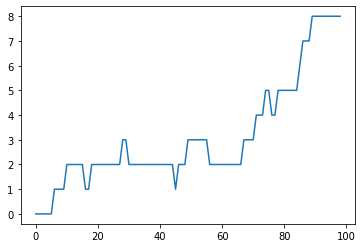

In [ ]:
# model_1
print(ppl_nothing, ppl_in, ppl_out)

import matplotlib.pyplot as plt
plt.plot(congestion_list)

model_4

In [ ]:
# model_4

for data in result:
    # 모델에 넣기 위해 reshape 진행
    data = data.values.reshape(1,20,1)

    # 모델에 집어넣고
    temp = model_4.predict(data)

    # 예측한 값의 0번째 값에 확률 나옴
    # 가장 가능성 높은 값과 그 위치
    prob = max(temp[0])
    idx = np.argmax(temp[0])

    if idx == 0:
        ppl_nothing +=1
        final_result.append([prob,'nothing'])
    elif idx == 1:
        ppl_in +=1
        final_result.append([prob,'in'])
        congestion +=1
    elif idx == 2:
        ppl_out +=1
        final_result.append([prob,'out'])
        congestion -=1
    congestion_list.append(congestion)

1/1 [==============================] - 0s 23ms/step


167 19 12


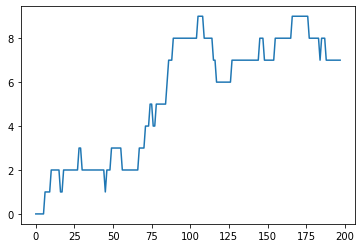

In [ ]:
# model_4
print(ppl_nothing, ppl_in, ppl_out)

import matplotlib.pyplot as plt
plt.plot(congestion_list)

model_5

In [ ]:
# model_5

for data in result:
    # 모델에 넣기 위해 reshape 진행
    data = data.values.reshape(1,20,1)

    # 모델에 집어넣고
    temp = model_5.predict(data)

    # 예측한 값의 0번째 값에 확률 나옴
    # 가장 가능성 높은 값과 그 위치
    prob = max(temp[0])
    idx = np.argmax(temp[0])

    if idx == 0:
        ppl_nothing +=1
        final_result.append([prob,'nothing'])
    elif idx == 1:
        ppl_in +=1
        final_result.append([prob,'in'])
        congestion +=1
    elif idx == 2:
        ppl_out +=1
        final_result.append([prob,'out'])
        congestion -=1
    congestion_list.append(congestion)

1/1 [==============================] - 0s 23ms/step


252 25 20


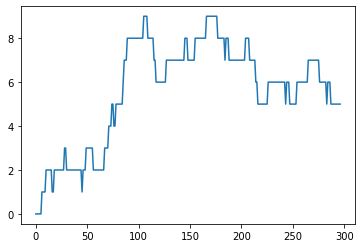

In [ ]:
# model_5
print(ppl_nothing, ppl_in, ppl_out)

import matplotlib.pyplot as plt
plt.plot(congestion_list)

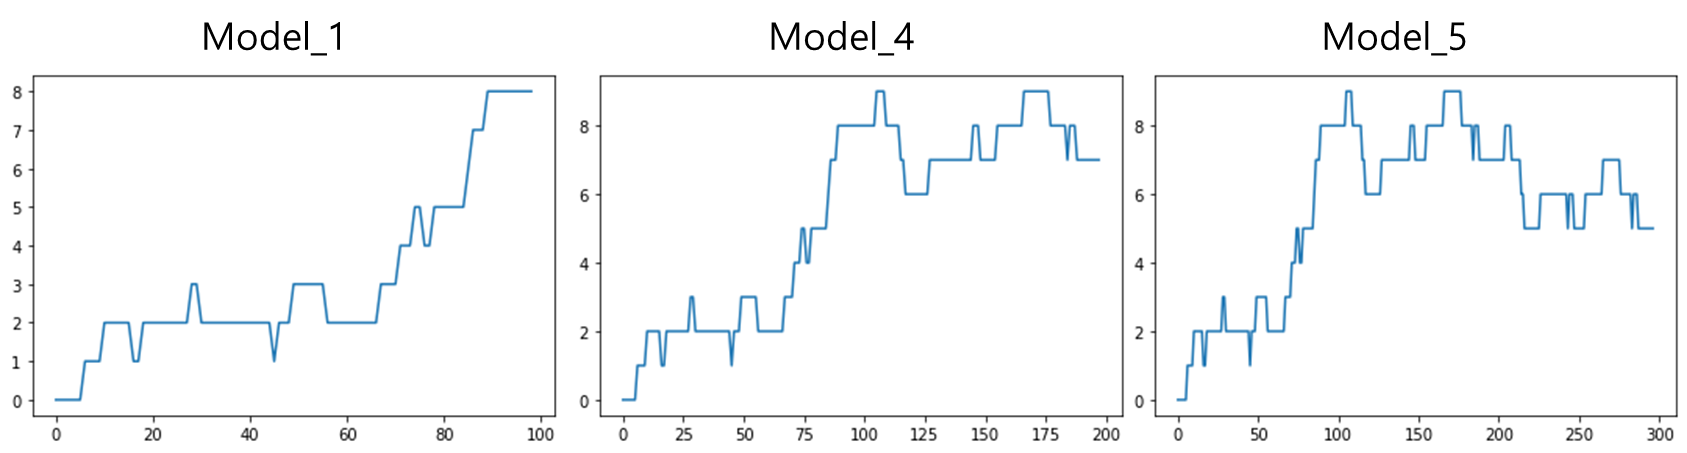

## 실제 데이터에서도 model_5가 가장 정확함

2 in 2 out 1 in 을 5번 반복함, out 을 잘 detect하지 못하는 경향 보임

최종적인 congestion은 5 -> model_5 최종값은 맞춤